## Importing the basic libraries

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
gold = pd.read_excel('D:/WORK/UNIVERSITY PROJECTS/OPTIMIZING INVESTMENT PORTFOLIOS SUBJECT TO RISK MANAGEMENT AND STRATEGIC PLANNING/Code/Gold Rates (1979-2021).xlsx')

gold.head()

,Date,India(INR)
0,1979-01-31,1840.8
1,1979-02-28,2011.7
2,1979-03-30,1940.2
3,1979-04-30,2013.1
4,1979-05-31,2253.4


## Basic preprocessing sections

### Renaming the column "India(INR)" to "Rate" for ease.

In [3]:
gold=gold.rename(columns={'India(INR)':'Rate'})

## 1) Extreme Value Theory (EVT)

### EVT is a statistical approach for modeling extreme events or tail risk. It can help you understand the likelihood and magnitude of extreme price movements in gold rates. By fitting an EVT model to your data, you can estimate the tail risk and identify potential risk factors that contribute to extreme price movements.

In [4]:
from scipy.stats import genextreme

# Fit the Extreme Value Distribution

fit_params = genextreme.fit(gold['Rate'])

shape, loc, scale = fit_params

# Estimate quantiles or Value at Risk (VaR)

confidence_level = 0.95

var = genextreme.ppf(confidence_level, shape, loc, scale)

print(var)

207515.9516394479


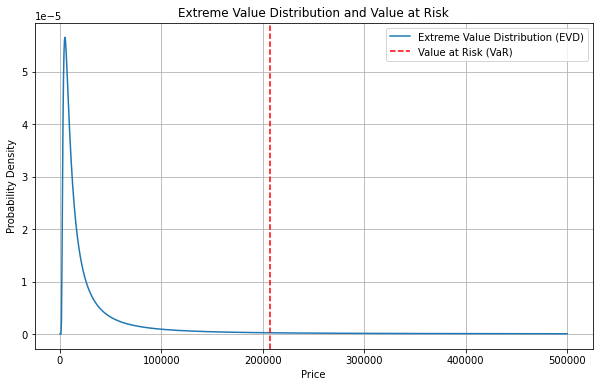

In [5]:
# Generate a range of values for the x-axis

x = np.linspace(0, 500000, 1000)

# Fit the Extreme Value Distribution

fit_params = genextreme.fit(gold['Rate'])

shape, loc, scale = fit_params

# Calculate the probability density function (PDF) using the fitted parameters

pdf = genextreme.pdf(x, shape, loc, scale)

# Estimate quantiles or Value at Risk (VaR)

confidence_level = 0.95

var = genextreme.ppf(confidence_level, shape, loc, scale)

# Create the plot

plt.figure(figsize=(10, 6))

plt.plot(x, pdf, label='Extreme Value Distribution (EVD)')

plt.axvline(x=var, color='red', linestyle='--', label='Value at Risk (VaR)')

plt.title('Extreme Value Distribution and Value at Risk')

plt.xlabel('Price')

plt.ylabel('Probability Density')

plt.legend()

plt.grid(True)

plt.show()

## Interpretation :

### The result suggests that, based on the Extreme Value Distribution fitted to the gold rate data, there is a certain confidence level (typically 95% or 99%) that the maximum potential loss in the gold rate will not exceed 207,515.95.

## 2) Cluster Analysis

### Cluster analysis can help identify groups or clusters of similar behavior in gold rates. By clustering periods with similar price dynamics, you may uncover different risk regimes or market conditions. This analysis can provide insights into how different factors affect gold rates in distinct market environments.

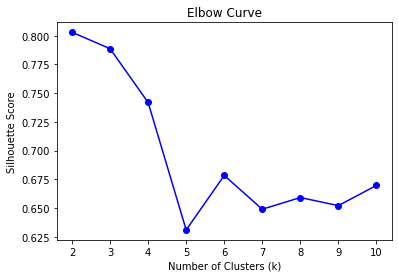

In [6]:
from sklearn.cluster import KMeans

from sklearn import metrics

# Select the features for clustering

X = np.array(gold['Rate']).reshape(-1, 1)

# Perform clustering with different numbers of clusters

k_values = range(2, 11)

silhouette_scores = []

for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    labels = kmeans.fit_predict(X)
    
    silhouette_scores.append(metrics.silhouette_score(X, labels))

# Plot the elbow curve

plt.plot(k_values, silhouette_scores, 'bo-')

plt.xlabel('Number of Clusters (k)')

plt.ylabel('Silhouette Score')

plt.title('Elbow Curve')

plt.show()

In [7]:
from sklearn.cluster import KMeans

# Perform K-means clustering

k = 5  # Number of clusters

kmeans = KMeans(n_clusters=k)

kmeans.fit(X)

# Get the cluster labels for each data point

cluster_labels = kmeans.labels_

gold['cluster_label']=cluster_labels

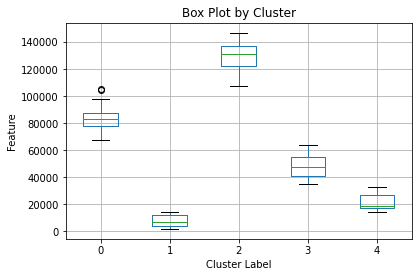

In [8]:
# Box plot by cluster

gold.boxplot(column='Rate', by='cluster_label')

plt.xlabel('Cluster Label')

plt.ylabel('Feature')

plt.title('Box Plot by Cluster')

plt.suptitle('')  # Remove default title

plt.show()

## Interpretation :

### From the above outcome, we found that the optimal number of clusters is 4. Now we can perform various Risk Analyzing techniques such as the Extreme Value Theory (EVT), LSTM (Long Short Term Memory) and the Event Study Analysis for each 4 clusters and interpret them as High-Risk or Low-Risk Factors.

## 3) Principal Component Analysis (PCA)

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract the price column as the feature for PCA
X = gold['Rate'].values.reshape(-1, 1)

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Determine the number of components explaining a desired amount of variance
desired_variance = 0.95
num_components = np.argmax(cumulative_var_ratio >= desired_variance) + 1

# Retain the desired number of components
X_pca_final = X_pca[:, :num_components]

# Create a DataFrame with the PCA components
pca_components = pd.DataFrame(X_pca_final, columns=['PC{}'.format(i) for i in range(1, num_components+1)])

# Combine the PCA components with the original data
pca_data = pd.concat([gold[['Date', 'Rate']], pca_components], axis=1)

# Display the explained variance ratio and cumulative explained variance
print("Explained Variance Ratio:")
print(explained_var_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_var_ratio)

# Display the retained number of components
print("\nNumber of Components Retained:", num_components)

# Display the PCA components and original data
print("\nPCA Components and Data:")
print(pca_data.head())

Explained Variance Ratio:
[1.]

Cumulative Explained Variance:
[1.]

Number of Components Retained: 1

PCA Components and Data:
        Date    Rate       PC1
0 1979-01-31  1840.8 -0.868192
1 1979-02-28  2011.7 -0.863449
2 1979-03-30  1940.2 -0.865433
3 1979-04-30  2013.1 -0.863410
4 1979-05-31  2253.4 -0.856741


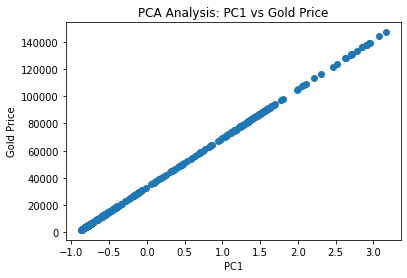

In [19]:
# Create a scatter plot of the PCA components

plt.scatter(pca_data['PC1'], gold['Rate'])

plt.xlabel('PC1')

plt.ylabel('Gold Price')

plt.title('PCA Analysis: PC1 vs Gold Price')

plt.show()

## Interpretation :

### i) Explained Variance Ratio:

#### The explained variance ratio represents the proportion of variance explained by each principal component. In your case, the single principal component (PC1) explains 100% of the variance, as indicated by the value of 1.0. This suggests that PC1 captures all the information present in the original price column.

### ii) Cumulative Explained Variance:

#### The cumulative explained variance represents the cumulative proportion of variance explained by the principal components. In your case, the cumulative explained variance is also 1.0, which means that PC1 alone accounts for the entire variance in the price column. This implies that no additional principal components are needed to capture meaningful variance.

### iii) Number of Components Retained: 

#### Since the explained variance ratio and cumulative explained variance are both 1.0, it indicates that only one principal component is needed to capture the variability in the gold price. Therefore, the number of components retained is 1.

### iv) PCA Components and Data:

#### The resulting DataFrame pca_data displays the original data along with the calculated principal component (PC1) values. Each row corresponds to a specific date and gold rate. PC1 represents a linear combination of the original price column that captures the most significant patterns or variability in the data. The values in the PC1 column indicate the contribution of each data point to the PC1 component.

### The analysis suggests that a single principal component (PC1) is sufficient to represent the gold rate data, capturing all the variability in the price column. PC1 can be interpreted as a representative measure or summary of the gold rate. This simplification can be useful in subsequent analysis or modeling tasks that require a lower-dimensional representation of the data.